In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


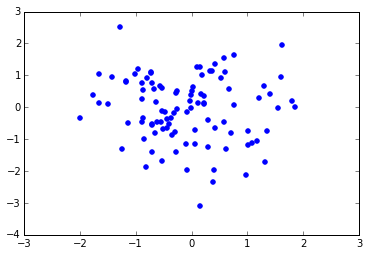

In [2]:
data = np.random.randn(2,100)
plt.scatter(data[0], data[1], color='b')

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


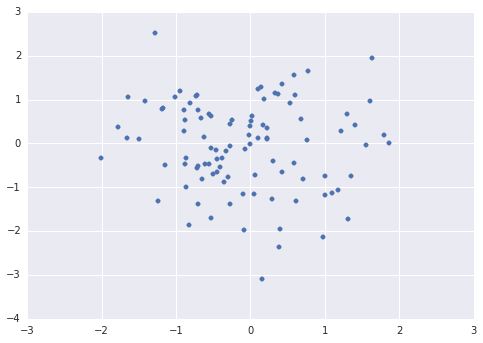

In [3]:
import seaborn as sns
sns.set(color_codes=True)
plt.scatter(data[0], data[1], color='b')

In [4]:
df = pd.read_csv('movies.csv')
df.head()

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
0,The Land Girls,146083,146083,NaN,8000000,12-Jun-98,R,NaN,Gramercy,NaN,NaN,NaN,NaN,NaN,6.1,1071
1,"First Love, Last Rites",10876,10876,NaN,300000,7-Aug-98,R,NaN,Strand,NaN,Drama,NaN,NaN,NaN,6.9,207
2,I Married a Strange Person,203134,203134,NaN,250000,28-Aug-98,NaN,NaN,Lionsgate,NaN,Comedy,NaN,NaN,NaN,6.8,865
3,Let's Talk About Sex,373615,373615,NaN,300000,11-Sep-98,NaN,NaN,Fine Line,NaN,Comedy,NaN,NaN,13,NaN,NaN
4,Slam,1009819,1087521,NaN,1000000,9-Oct-98,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,NaN,62,3.4,165


In [5]:
df.shape

(3201, 16)

In [6]:
cols = ['US Gross', 'Worldwide Gross']
df[cols] = df[cols].convert_objects(convert_numeric=True)

rdate = pd.to_datetime(df['Release Date'], format='%d-%b-%y', coerce=True)
rdate[rdate > '2015-01-01'] -=  np.timedelta64(100, 'Y')
df['Release Date'] = rdate

C:\Users\Karthik\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
C:\Users\Karthik\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead


In [7]:
df.shape

(3201, 16)

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


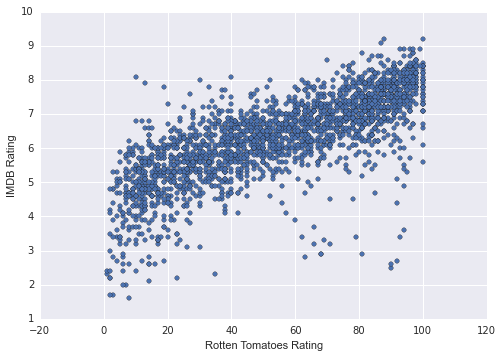

In [8]:
_ =df.plot(x='Rotten Tomatoes Rating', y='IMDB Rating', kind='scatter')

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


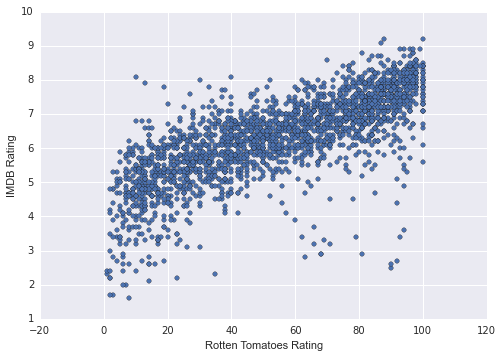

In [9]:
plt.scatter(x=df['Rotten Tomatoes Rating'], y=df['IMDB Rating'])
plt.xlabel('Rotten Tomatoes Rating')
_ =plt.ylabel('IMDB Rating')

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


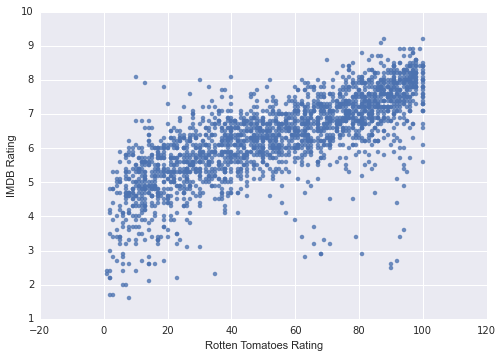

In [10]:
_ = sns.regplot(df['Rotten Tomatoes Rating'], df['IMDB Rating'], fit_reg=False)

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


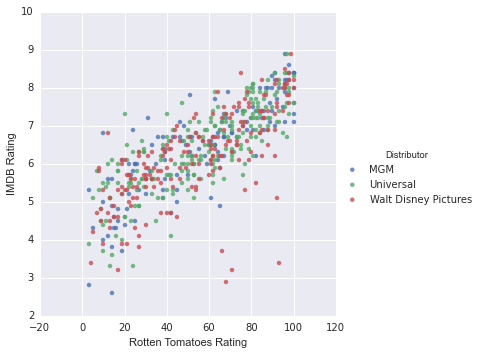

In [11]:
few_distributors = ['Universal', 'Walt Disney Pictures', 'MGM']
df_few_distributors = df[df['Distributor'].isin(few_distributors)]
_ = sns.lmplot('Rotten Tomatoes Rating', 'IMDB Rating', data=df_few_distributors, hue='Distributor', fit_reg=False)

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


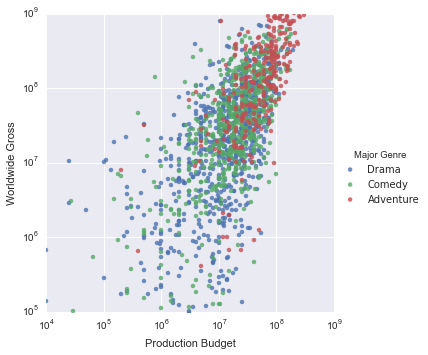

In [12]:
few_genres = ['Comedy', 'Adventure', 'Drama']
df_few_genres = df[df['Major Genre'].isin(few_genres)]
grid = sns.lmplot('Production Budget', 'Worldwide Gross', data=df_few_genres, hue='Major Genre', fit_reg=False)
_ = grid.set( xscale='log', yscale='log', xlim=(1e4,1e9), ylim=(1e5,1e9) )

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


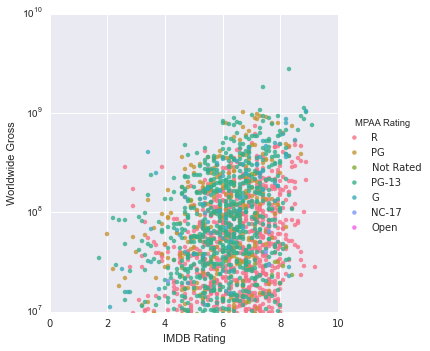

In [13]:
grid = sns.lmplot('IMDB Rating', 'Worldwide Gross', data=df, hue='MPAA Rating' , fit_reg=False)
_ = grid.set(yscale='log')

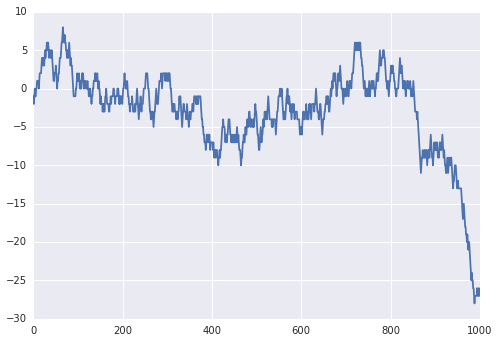

In [14]:
decisions = np.random.randint(-1, 2, 1000)
locations = np.cumsum(decisions)
plt.plot(locations)

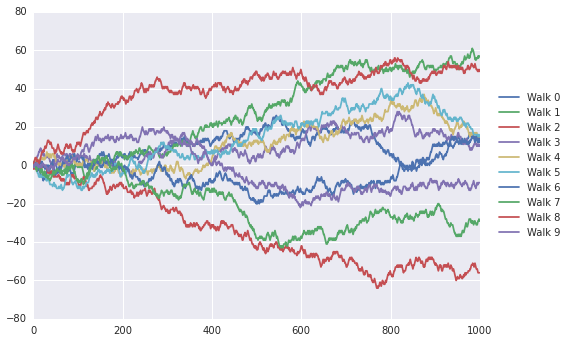

In [15]:
for i in range(10):
    decisions = np.random.randint(-1, 2, 1000)
    locations = np.cumsum(decisions)
    plt.plot(locations, label="Walk %d"%i)
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5))    

(1950, 2010)

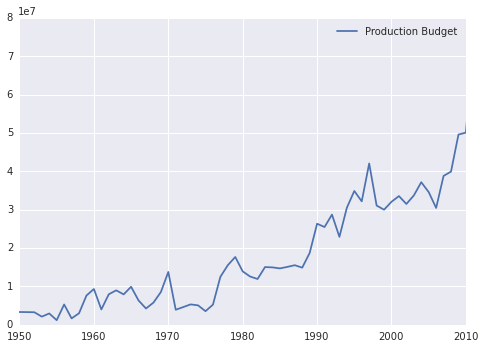

In [16]:
years = pd.DatetimeIndex(df['Release Date']).year
by_year = df.groupby(years)
budget_mean_by_year = by_year[['Production Budget']].mean()

budget_mean_by_year.plot()
plt.xlim(1950, 2010)

(1950, 2010)

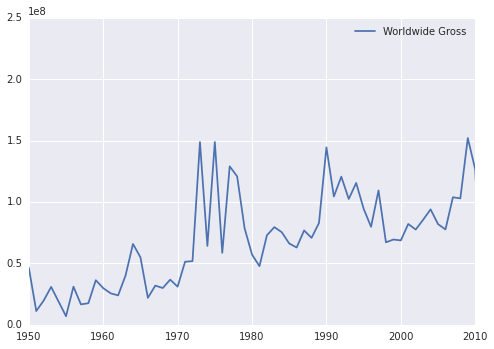

In [17]:
years = pd.DatetimeIndex(df['Release Date']).year
by_year = df.groupby(years)
gross_mean_by_year = by_year[['Worldwide Gross']].mean()
gross_mean_by_year.plot()
plt.xlim(1950, 2010)

C:\Users\Karthik\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


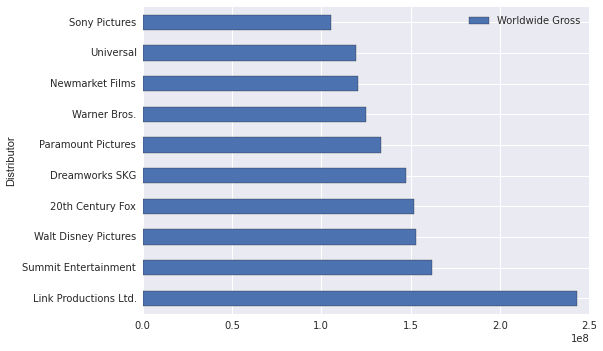

In [18]:
by_distributor = df.groupby('Distributor')
mean_gross = by_distributor[['Worldwide Gross']].mean()
top_gross_distributors = mean_gross.sort('Worldwide Gross', ascending=False).head(10)
_ = top_gross_distributors.plot(kind='barh')

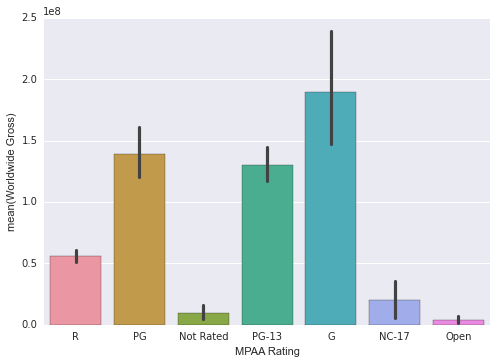

In [19]:
_ = sns.barplot(x='MPAA Rating', y='Worldwide Gross', data=df)

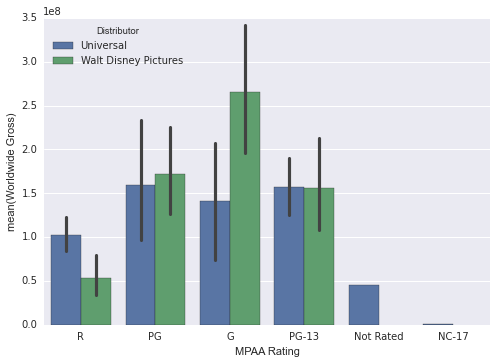

In [20]:
df_universal_disney = df[df['Distributor'].isin(['Universal','Walt Disney Pictures'])]
_ = sns.barplot(x='MPAA Rating', y='Worldwide Gross', data=df_universal_disney, hue='Distributor')

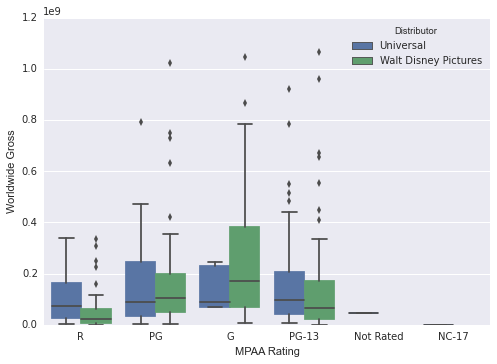

In [21]:
_ = sns.boxplot(x='MPAA Rating', y='Worldwide Gross', data=df_universal_disney, hue='Distributor')

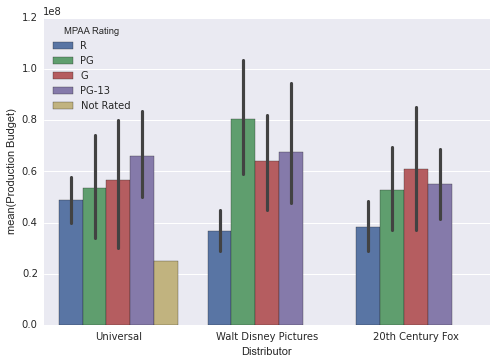

In [22]:
df_20th_universal_disney = df[ df['Distributor'].isin(['20th Century Fox', 'Universal', 'Walt Disney Pictures']) ]
df_genres_distributors = df_20th_universal_disney[ df_20th_universal_disney['Major Genre'].isin(['Drama', 'Adventure', 'Thriller/Suspense']) ]
_ = sns.barplot(x='Distributor', y='Production Budget', data=df_genres_distributors, hue='MPAA Rating')

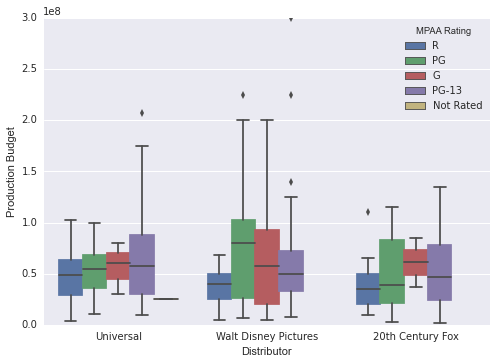

In [23]:
_ = sns.boxplot(x='Distributor', y='Production Budget', data=df_genres_distributors, hue='MPAA Rating')

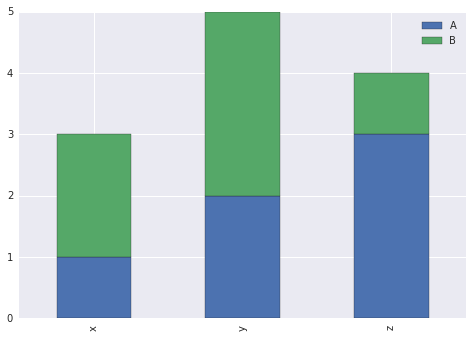

In [24]:
df_toy = pd.DataFrame({'A':[1,2,3], 'B':[2,3,1]}, index=list('xyz'))
df_toy.plot(kind='bar', stacked=True)

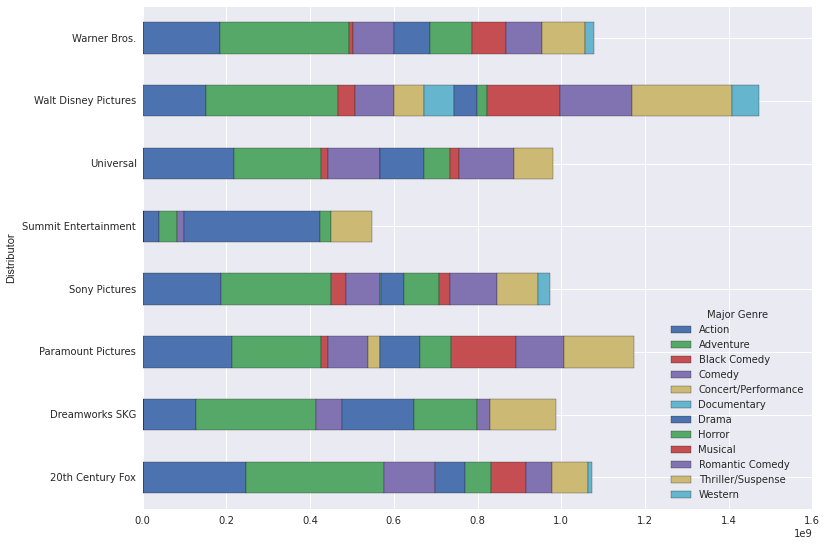

In [25]:
years = pd.DatetimeIndex(df['Release Date']).year
df_in_years = df[ (years>=1991) & (years<=2010) ]
top_dstr = ['Summit Entertainment', '20th Century Fox', 
                    'Warner Bros.', 'Walt Disney Pictures', 
                    'Dreamworks SKG', 'Paramount Pictures',  
                    'Universal', 'Sony Pictures']
df_top_dstr = df_in_years[df_in_years.Distributor.isin(top_dstr)]
df_genre_pivot = df_top_dstr.pivot_table(values='Worldwide Gross', columns='Major Genre', index='Distributor', aggfunc=np.mean)
df_genre_pivot.plot(kind='barh', stacked=True, figsize=(12,9))

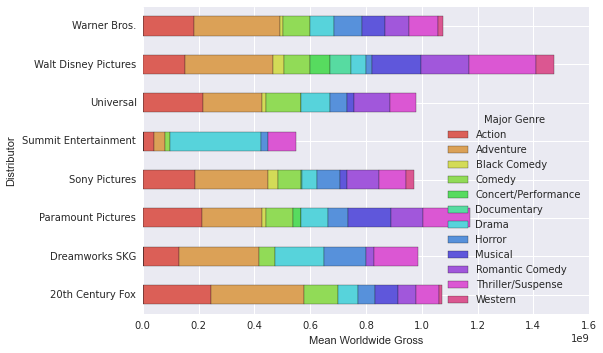

In [26]:
with sns.hls_palette(12):
    df_genre_pivot.plot(kind='barh', stacked=True)
_ = plt.xlabel('Mean Worldwide Gross')    

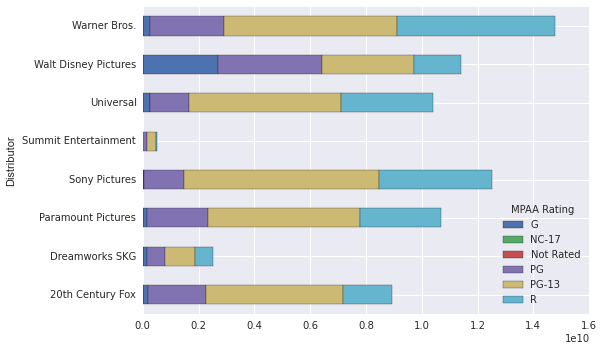

In [27]:
df_mpaa_pivot = df_top_dstr.pivot_table(index='Distributor', columns='MPAA Rating', values='Production Budget', aggfunc=np.sum)
df_mpaa_pivot.plot(kind='barh', stacked=True)

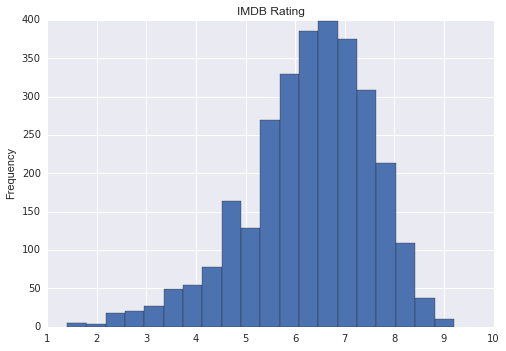

In [28]:
df['IMDB Rating'].plot(kind='hist', bins=20, title='IMDB Rating')

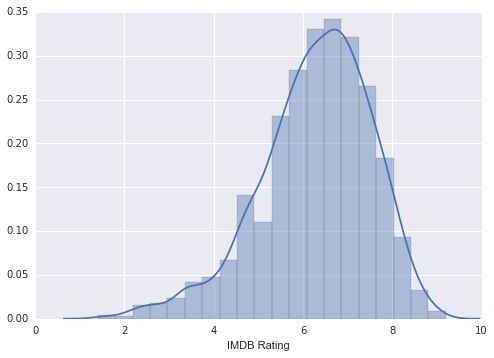

In [29]:
sns.distplot(df['IMDB Rating'].dropna(), kde=True, bins=20)

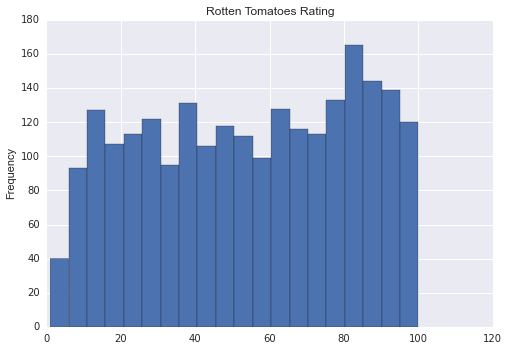

In [30]:
df['Rotten Tomatoes Rating'].plot(kind='hist', bins=20, title='Rotten Tomatoes Rating')

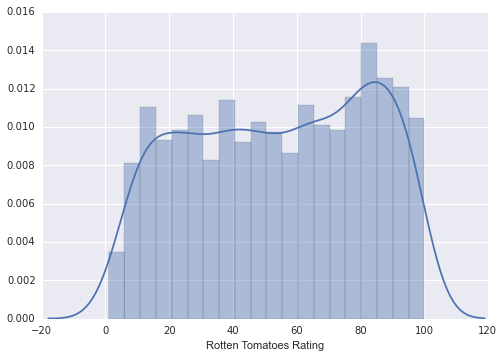

In [31]:
sns.distplot(df['Rotten Tomatoes Rating'].dropna(), bins=20, kde=True)

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


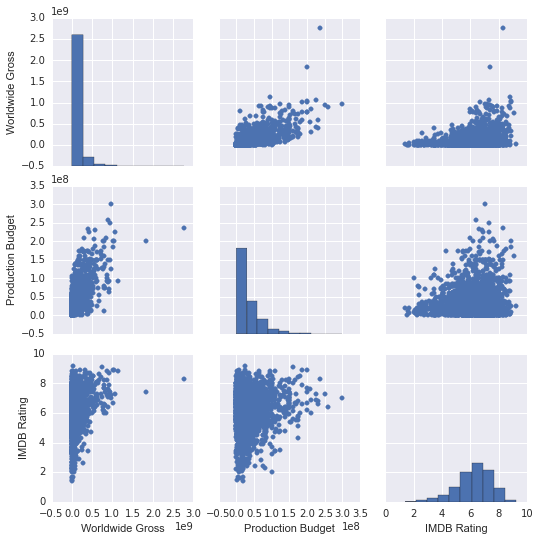

In [32]:
df_cleaned = df[['Worldwide Gross', 'Production Budget', 'IMDB Rating', 'MPAA Rating']].dropna()
sns.pairplot(df_cleaned)

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


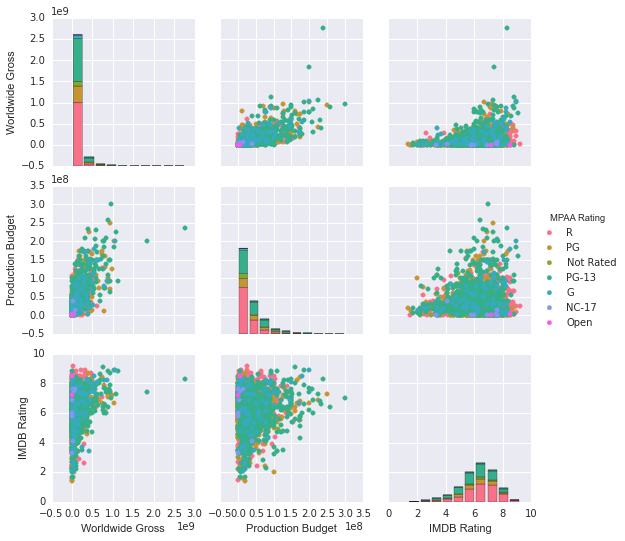

In [33]:
sns.pairplot(df_cleaned, hue='MPAA Rating')

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


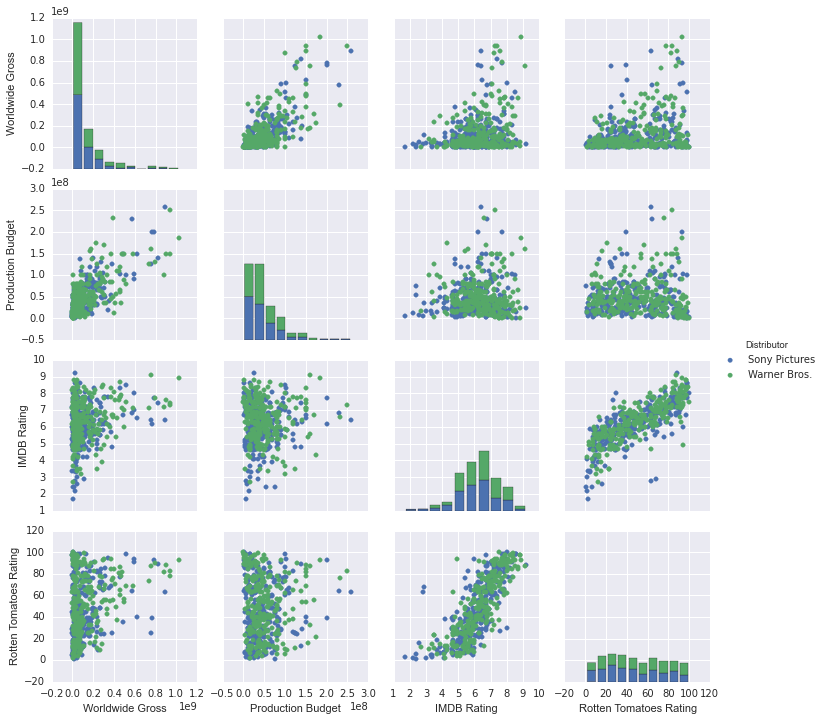

In [34]:
df_ws = df[ (df['Distributor'].isin(['Warner Bros.', 'Sony Pictures'])) ]
df_ws_cleaned = df_ws[['Worldwide Gross', 'Production Budget', 'IMDB Rating', 'Rotten Tomatoes Rating', 'Distributor']].dropna()
sns.pairplot(df_ws_cleaned, hue='Distributor')

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


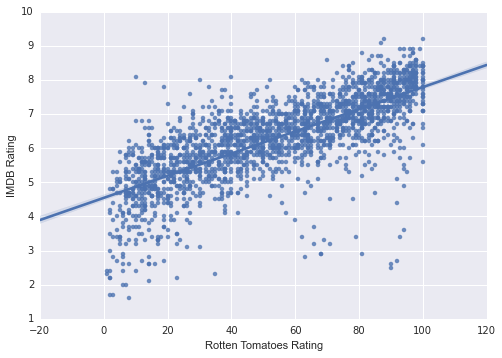

In [35]:
sns.regplot(x='Rotten Tomatoes Rating', y='IMDB Rating', data=df)

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


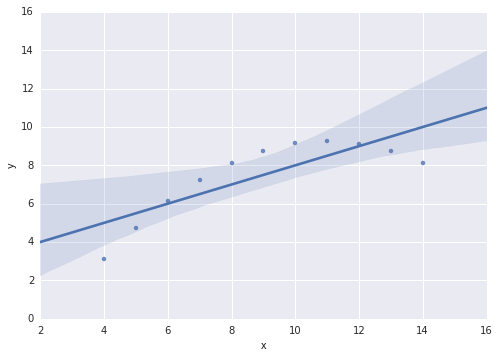

In [36]:
df_ans = sns.load_dataset("anscombe")
df_ans2 = df_ans.loc[df_ans.dataset == "II"]
sns.regplot(x="x", y="y", data=df_ans2);

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


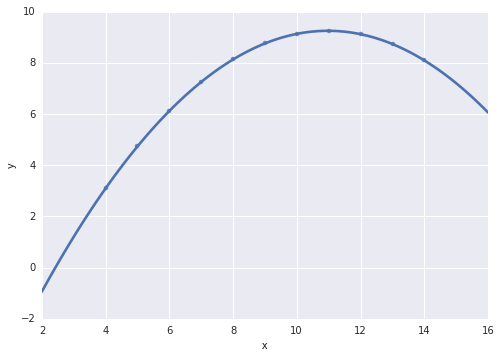

In [37]:
sns.regplot(x="x", y="y", data=df_ans2, order=2);

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


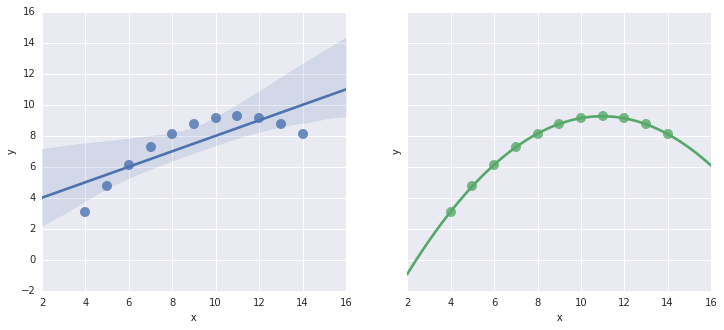

In [38]:
fig, axes = plt.subplots(ncols=2, figsize=(12,5), sharey=True)
sns.regplot(x="x", y="y", data=df_ans2, ax=axes[0], scatter_kws={"s": 100})
sns.regplot(x="x", y="y", data=df_ans2, order=2, ax=axes[1], scatter_kws={"s": 100})

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


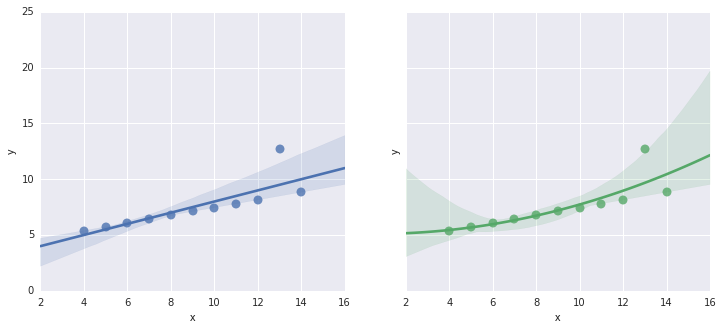

In [39]:
df_ans = sns.load_dataset("anscombe")
df_ans3 = df_ans.loc[df_ans.dataset == 'III']

fig, axes = plt.subplots(ncols=2, figsize=(12,5), sharey=True)
sns.regplot(x='x', y='y', data=df_ans3, ax=axes[0], scatter_kws={"s": 80})
sns.regplot(x='x', y='y', data=df_ans3, order=2, ax=axes[1], scatter_kws={"s": 80})

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


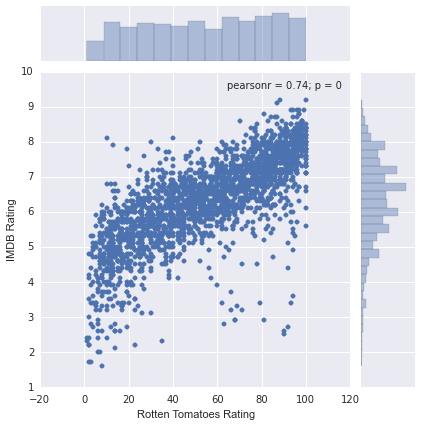

In [40]:
sns.jointplot(x='Rotten Tomatoes Rating', y='IMDB Rating', data=df)

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


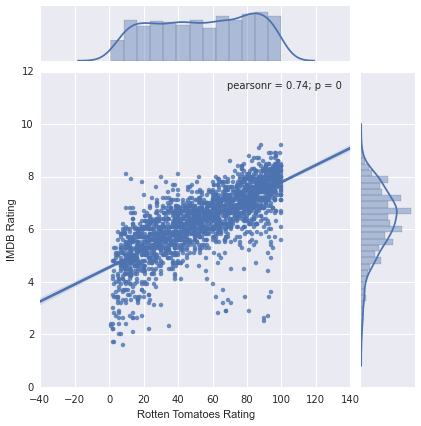

In [41]:
sns.jointplot(x='Rotten Tomatoes Rating', y='IMDB Rating', data=df, kind='reg')

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


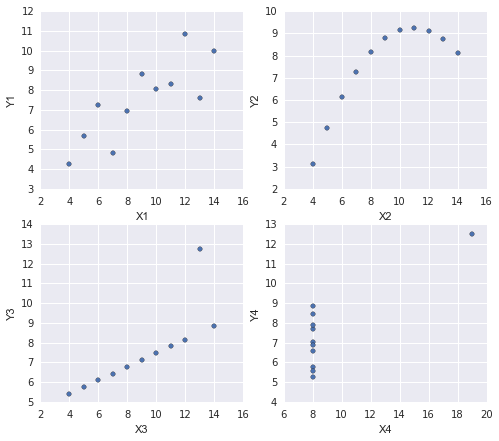

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(8,7))
rome_nums = ['I', 'II', 'III', 'IV']
for i,ax in enumerate(axs.flat):
    j = i+1
    df_i = df_ans[df_ans.dataset == rome_nums[i]]
    df_i.plot(x='x', y='y', kind='scatter', ax=ax)
    ax.set_xlabel('X%d'%j)
    ax.set_ylabel('Y%d'%j)

In [43]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
df_ans3 = df_ans[['x','y']][df_ans.dataset == 'III'].reset_index(drop=True)
df_ans4 = df_ans[['x','y']][df_ans.dataset == 'IV'].reset_index(drop=True)
model1 = smf.ols('y ~ x', data = df_ans3).fit()
model1.summary()

C:\Users\Karthik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Sun, 18 Oct 2015   Prob (F-statistic):            0.00218
Time:                        00:13:06   Log-Likelihood:                -16.838
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.0025      1.124      2.670      0.026         0.459     5.546
x              0.4997      0.118      4.239      0.002         0.233     0.766
==============================================================================
Omnibus:                       19.540   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.478
Skew:                           2.041   Prob(JB):                      0.00118
Kurtosis:                       6.571   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
influence = model1.get_influence()
cooks_dist = influence.cooks_distance[0]
num_observations = len(df_ans3)

cooks_threshold = 4/num_observations

df_ans3[cooks_dist > cooks_threshold]

,x,y
2,13,12.74


(0, 1.5)

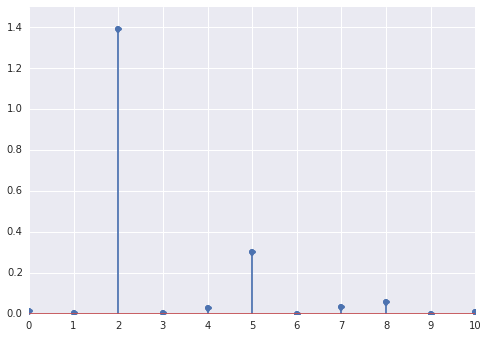

In [45]:
plt.stem(cooks_dist)
plt.xticks( range(len(df_ans3)) )
plt.ylim(0, 1.5)

In [46]:
number_of_observations = len(df_ans3)
number_of_parameters = 2
dffits = influence.dffits[0]

dffits_threshold = 2 * np.sqrt(number_of_parameters/number_of_observations)
df_ans3[dffits > dffits_threshold]

,x,y
2,13,12.74


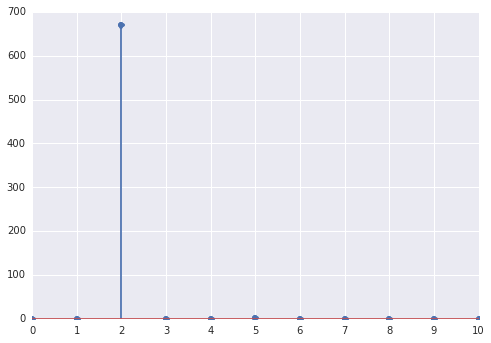

In [47]:
plt.stem( np.abs(dffits) )
_ = plt.xticks( range(len(df_ans3)))

In [48]:
outlier_criterion = (cooks_dist > cooks_threshold)
outlier_indexes = np.nonzero(outlier_criterion)[0]

df_ans3_cleaned = df_ans3[~outlier_criterion]
print("%d points before removal and %d points after removal"%(len(df_ans3),len(df_ans3_cleaned)))

11 points before removal and 10 points after removal


In [49]:
model2 = smf.ols('y ~ x', data = df_ans3_cleaned).fit()
model2.summary()

C:\Users\Karthik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.161e+06
Date:                Sun, 18 Oct 2015   Prob (F-statistic):           6.17e-22
Time:                        00:13:09   Log-Likelihood:                 44.749
No. Observations:                  10   AIC:                            -85.50
Df Residuals:                       8   BIC:                            -84.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.0056      0.003   1369.808      0.000         3.999     4.012
x              0.3454      0.000   1077.352      0.000         0.345     0.346
==============================================================================
Omnibus:                        0.202   Durbin-Watson:                   2.405
Prob(Omnibus):                  0.904   Jarque-Bera (JB):                0.377
Skew:                           0.156   Prob(JB):                        0.828
Kurtosis:                       2.101   Cond. No.                         27.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
print("Before outlier removal, R-squared was %f"%(model1.rsquared_adj))
print("After outlier removal, R-squared is %f"%(model2.rsquared_adj))

Before outlier removal, R-squared was 0.629249
After outlier removal, R-squared is 0.999992


C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


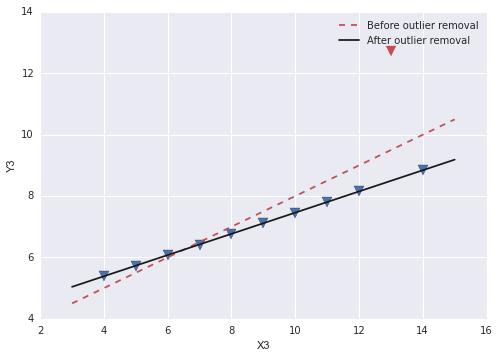

In [51]:
xs = np.linspace(3, 15, 2)
ys1 = model1.predict({'x': xs})
ys2 = model2.predict({'x': xs})
plt.scatter(df_ans3_cleaned.x, df_ans3_cleaned.y, s=100, marker='v')
plt.scatter(df_ans3.ix[outlier_indexes, 'x'], df_ans3.ix[outlier_indexes, 'y'], s=100, color='r', marker='v')
plt.plot(xs, ys1, 'r--', label='Before outlier removal')
plt.plot(xs, ys2, 'k', label='After outlier removal')
plt.legend(loc='upper right')
plt.xlabel('X3')
plt.ylabel('Y3')
plt.grid(True)

In [52]:
# Step 1. [CODE PROVIDED] Generate a toy dataset
np.random.seed(0)
X = np.arange(23)
Y = X * 2 + 3 + np.random.randn(len(X))

# Add artificial outliers
X = np.insert(X, 5, 10)
Y = np.insert(Y, 5, 55)
X = np.insert(X, 10, 3)
Y = np.insert(Y, 10, 30)

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


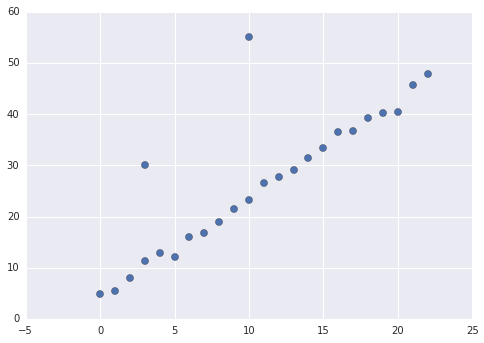

In [53]:
plt.scatter(X, Y, s=50)

In [61]:
df_toy = pd.DataFrame( {'X':X, 'Y':Y} )
df_toy
model1 = smf.ols('Y ~ X', data=df_toy).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     60.87
Date:                Sun, 18 Oct 2015   Prob (F-statistic):           6.57e-08
Time:                        00:53:01   Log-Likelihood:                -84.660
No. Observations:                  25   AIC:                             173.3
Df Residuals:                      23   BIC:                             175.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.9222      2.844      2.786      0.011         2.039    13.805
X              1.7755      0.228      7.802      0.000         1.305     2.246
==============================================================================
Omnibus:                       42.102   Durbin-Watson:                   2.311
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.732
Skew:                           3.220   Prob(JB):                     1.24e-30
Kurtosis:                      12.526   Cond. No.                         23.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
influence = model1.get_influence()
cooks_distance = influence.cooks_distance[0]
number_of_observations = len(X)

cooks_threshold = 4/number_of_observations
df_toy[cooks_distance > cooks_threshold]

,X,Y
5,10,55
10,3,30


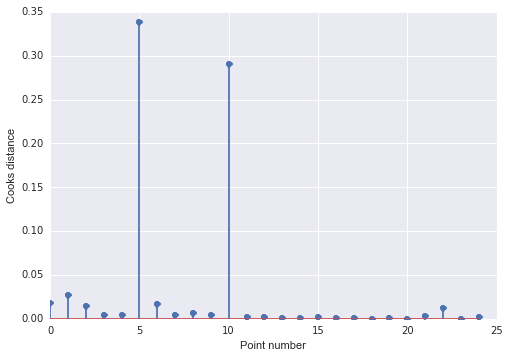

In [69]:
plt.stem(cooks_distance)
plt.xlabel('Point number')
plt.ylabel('Cooks distance')

In [67]:
dffits = influence.dffits[0]
number_of_parameters = 2

dffits_threshold = 2 * np.sqrt(number_of_parameters/number_of_observations)
df_toy[np.abs(dffits) > dffits_threshold]

,X,Y
5,10,55
10,3,30


<Container object of 3 artists>

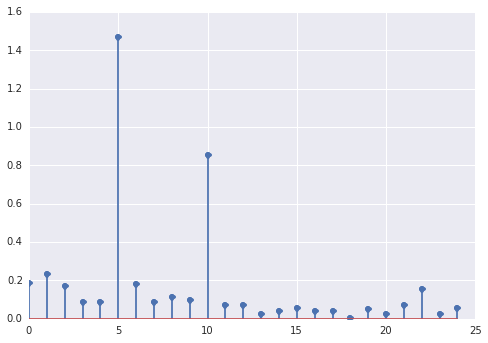

In [71]:
plt.stem( np.abs(dffits) )

In [77]:
outlier_criterion = (cooks_distance > cooks_threshold)
outlier_indexes = np.nonzero(outlier_criterion)[0]

df_toy_cleaned = df_toy[~outlier_criterion]
model2 = smf.ols('Y~X', data=df_toy_cleaned).fit()

print("R-squared before removal was %f"%(model1.rsquared_adj))
print("R-squared after removal is %f"%(model2.rsquared_adj))

R-squared before removal was 0.713855
R-squared after removal is 0.994525


C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


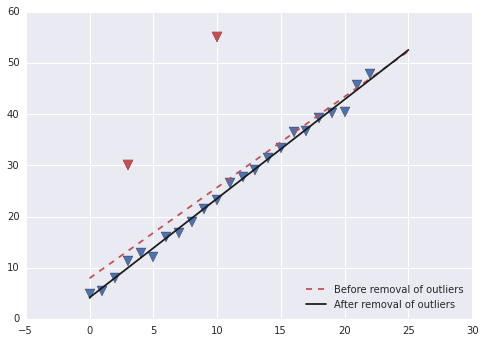

In [83]:
xs = np.linspace(0,25,2)
ys1 = model1.predict({'X': xs})
ys2 = model2.predict({'X': xs})

plt.scatter(df_toy.X, df_toy.Y, marker='v', s=100)
plt.scatter(df_toy.ix[outlier_indexes, 'X'], df_toy.ix[outlier_indexes, 'Y'], marker='v', color='r', s=100)

plt.plot(xs, ys1, 'r--', label='Before removal of outliers')
plt.plot(xs, ys2, 'k', label='After removal of outliers')
plt.legend(loc='lower right')